<a href="https://colab.research.google.com/github/maperezp/Proyecto-CDA/blob/main/src/ModelosClasificacionInfeccionPostTx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LIBRERIAS**

In [168]:
### Importación de librerias
import pandas as pd
import seaborn as sns

# graficas
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


# **1. PREPARACIÓN DE DATOS**


In [169]:
# Carga de datos
data= pd.read_excel("../Data/Base_infecciones_POPTH_nuevo_modelado.xlsx")


In [170]:
data.shape

(557, 62)

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 62 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Código anonimizado                          557 non-null    object        
 1   #Paciente_Tx                                557 non-null    int64         
 2   Etiología_#1                                557 non-null    object        
 3   Etiología_#2                                557 non-null    object        
 4   Edad                                        557 non-null    int64         
 5   Sexo                                        557 non-null    object        
 6   Child_Pugh_Score_Cat                        158 non-null    object        
 7   Child_Pugh_Score                            557 non-null    int64         
 8   Meld_Score                                  557 non-null    int64         
 9   Diabetes_M

Se eliminan las columnas de identificación de pacientes para el modelado.

In [172]:
data_modelo= data.drop(columns=[ "Código anonimizado", "#Paciente_Tx"])

Se eliminan las columnas tipo fecha y aquellas con datos faltantes.

In [173]:
lista_nan = ["Child_Pugh_Score_Cat","Tiempo_Cx","Tipo_Reconstrucción_Biliar","Tiempo_Isquemia_Fria","Tiempo_Isquemia_caliente","Días_En_Hospitalización_Piso_Post_Tx","UCI_6_meses_Pre_Tx","Diabetes_Mellitus","Meld_Score","Días_En_UCI_Post_Tx","Días_En_UCI_Pre_Tx","Días_Totales_Intrahospitalarios_Post_Tx","Reintervención_Quirúrgica_hasta_1m_POP", 
            "Vivo_Hoy", "SOBREVIDA_DIAS", "SOBREVIDA_MESES", "SOBREVIDA_AÑOS","Fecha_Egreso_Hospitalario", "Fecha_Control/Muerte", "Fecha_Ingreso_Hospitalario", "Días_Totales_Intrahospitalarios_Pre_Tx", "Fecha_Tx", "Año_Tx"]

In [174]:
data_modelo=data_modelo.drop(columns=lista_nan, errors = "ignore")

In [175]:
data_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 37 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Etiología_#1                                557 non-null    object 
 1   Etiología_#2                                557 non-null    object 
 2   Edad                                        557 non-null    int64  
 3   Sexo                                        557 non-null    object 
 4   Child_Pugh_Score                            557 non-null    int64  
 5   Tabaquismo                                  557 non-null    object 
 6   Alcoholismo                                 557 non-null    object 
 7   Hipertensión_Arterial                       557 non-null    object 
 8   Peso_previo_Cx                              557 non-null    float64
 9   Talla                                       557 non-null    int64  
 10  IMC           

Una vez hemos homogenizado la base de datos de los valores faltantes, podemos proceder a aplicar el pipeline que aplica el modelo.

Como nuestro objetivo es encontrar si existió infección post transplante (1 si sí, 0 de lo contrario), crearemos una nueva variable que condense esa información. Los parámetros para determinar el valor de esta nueva variable serán si alguno de los valores las variables que inician con "Inmunosupresor" contiene un valor distinto a -1.

In [176]:
inmuno_var= ["Inmunosupresor_2_PostTx",
"Inmunosupresor_1_1mesPostTx",
"Inmunosupresor_1_Postx",
"Inmunosupresor_2_PostTx_1mesPx",
"Inmunosupresor_1_6mesesPostx",
"Inmunosupresor_2_6mesesPostTx"]

In [177]:
data_modelo[inmuno_var]

,Inmunosupresor_2_PostTx,Inmunosupresor_1_1mesPostTx,Inmunosupresor_1_Postx,Inmunosupresor_2_PostTx_1mesPx,Inmunosupresor_1_6mesesPostx,Inmunosupresor_2_6mesesPostTx
0,MICOFENOLATO,CICLOSPORINA,CICLOSPORINA,MICOFENOLATO,TACROLIMUS,MICOFENOLATO
1,MICOFENOLATO,DESCONOCIDO,CICLOSPORINA,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO
2,MICOFENOLATO,CICLOSPORINA,CICLOSPORINA,MICOFENOLATO,CICLOSPORINA,No
3,MICOFENOLATO,CICLOSPORINA,CICLOSPORINA,MICOFENOLATO,CICLOSPORINA,No
4,MICOFENOLATO,CICLOSPORINA,CICLOSPORINA,MICOFENOLATO,TACROLIMUS,MICOFENOLATO
...,...,...,...,...,...,...
552,MICOFENOLATO,TACROLIMUS,TACROLIMUS,MICOFENOLATO,TACROLIMUS,MICOFENOLATO
553,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO,DESCONOCIDO
554,MICOFENOLATO,TACROLIMUS,TACROLIMUS,MICOFENOLATO,TACROLIMUS,MICOFENOLATO
555,MICOFENOLATO,TACROLIMUS,TACROLIMUS,MICOFENOLATO,TACROLIMUS,No


In [178]:
invalidos = ["No", "Desconocido"]


In [179]:
data_modelo["infeccion_post_TX"]= (~data_modelo[inmuno_var].isin(invalidos).any(axis=1)).astype(int)


Podemos evidenciar la nueva columna calculada que codifica si un paciente tuvo infección o no luego de el tratamiento

In [180]:
data_modelo["infeccion_post_TX"].value_counts()

infeccion_post_TX
1    477
0     80
Name: count, dtype: int64

In [181]:
num_vars = data_modelo.select_dtypes(include="number").columns
cat_vars = data_modelo.select_dtypes(exclude="number").columns

In [182]:
num_vars

Index(['Edad', 'Child_Pugh_Score', 'Peso_previo_Cx', 'Talla', 'IMC',
       'Días_Tratamiento_Antibiótico_Previo_A_Tx#1',
       'Tiempo_De_Dosis_Hasta_Tx#1', 'Nutrición_Enteral',
       'Días_Nutrición_Enteral', 'Complicaciones_Técnicas',
       'Dias_Estancia_Hospitalaria', 'infeccion_post_TX'],
      dtype='object')

In [183]:
cat_vars

Index(['Etiología_#1', 'Etiología_#2', 'Sexo', 'Tabaquismo', 'Alcoholismo',
       'Hipertensión_Arterial', 'UCI_al_Momento_Tx', 'Infección_Al_Momento_Tx',
       'Localización de la infección', 'Germen/Microorganismo aislado',
       'Antibiotico_previo_al_Tx', 'Antibiótico_Profiláctico_VS_Terapéutico',
       'Antibiótico_1__Tx#1', 'Antibiótico_2_Tx#1', 'Antibiótico_3_Tx#1',
       'Antifúngico_Tx#1', 'Inmunosupresión_con_Anticuerpos',
       'Inmunosupresor_1_Postx', 'Inmunosupresor_2_PostTx',
       'Inmunosupresor_1_1mesPostTx', 'Inmunosupresor_2_PostTx_1mesPx',
       'Inmunosupresor_1_6mesesPostx', 'Inmunosupresor_2_6mesesPostTx',
       'Requerimiento_de_diálisis', 'Trasfusión_GRE_hasta_1m_POP',
       'Retrasplante'],
      dtype='object')

In [184]:
data_modelo_dum = pd.get_dummies(data_modelo, columns=cat_vars, prefix=cat_vars, prefix_sep="=", dummy_na=False)

In [185]:
dum_cols = [c for c in data_modelo_dum.columns if "=" in c]
data_modelo_dum[dum_cols] = data_modelo_dum[dum_cols].astype(int)

In [186]:
data_modelo = data_modelo_dum.copy()

Realizamos una selección de variables para el modelado, eliminando las columnas que no aportan información relevante o que pueden generar ruido en el modelo.

In [187]:
from scipy.stats import ks_2samp, chi2_contingency

umbral_p = 0.05  # Flexibilidad para datasets pequeños
num_sel = []
for col in num_vars:
    class0 = data_modelo[data_modelo['infeccion_post_TX']==0][col]
    class1 = data_modelo[data_modelo['infeccion_post_TX']==1][col]
    ks_stat, ks_p = ks_2samp(class0, class1)
    if ks_p < umbral_p:
        num_sel.append(col)

cat_sel = []
for col in dum_cols:
    table = pd.crosstab(data_modelo[col], data_modelo['infeccion_post_TX'])
    try:
        _, chi2_p, _, _ = chi2_contingency(table)
        if chi2_p < umbral_p:
            cat_sel.append(col)
    except:
        pass # Para categorías con una sola clase puede fallar

vars_final = list(set(num_sel + cat_sel))

if len(vars_final) == 0:
    print(f"Ninguna variable supera p < {umbral_p}. Usando todas las numéricas y dummies de país/género como fallback.")
else:
    print(f"Variables seleccionadas (p < {umbral_p}):", vars_final)

X = data_modelo[vars_final]
y = data_modelo['infeccion_post_TX']

Variables seleccionadas (p < 0.05): ['Inmunosupresor_2_6mesesPostTx=No', 'Inmunosupresor_1_Postx=No', 'Inmunosupresor_2_6mesesPostTx=MICOFENOLATO', 'Antibiótico_1__Tx#1=CEFTAZIDIMA AVIBACTAM', 'Inmunosupresor_2_PostTx=No', 'Inmunosupresor_1_1mesPostTx=No', 'Antifúngico_Tx#1=VORICONAZOL', 'Requerimiento_de_diálisis=NO', 'Etiología_#1=CIRROSIS DEL INJERTO', 'Inmunosupresor_2_PostTx_1mesPx=MICOFENOLATO', 'Inmunosupresor_1_6mesesPostx=No', 'Requerimiento_de_diálisis=SI', 'Inmunosupresor_2_PostTx=MICOFENOLATO', 'Dias_Estancia_Hospitalaria', 'Inmunosupresor_2_PostTx_1mesPx=No', 'infeccion_post_TX', 'Trasfusión_GRE_hasta_1m_POP=NO', 'Trasfusión_GRE_hasta_1m_POP=SI']


In [188]:
X

,Inmunosupresor_2_6mesesPostTx=No,Inmunosupresor_1_Postx=No,Inmunosupresor_2_6mesesPostTx=MICOFENOLATO,Antibiótico_1__Tx#1=CEFTAZIDIMA AVIBACTAM,Inmunosupresor_2_PostTx=No,Inmunosupresor_1_1mesPostTx=No,Antifúngico_Tx#1=VORICONAZOL,Requerimiento_de_diálisis=NO,Etiología_#1=CIRROSIS DEL INJERTO,Inmunosupresor_2_PostTx_1mesPx=MICOFENOLATO,Inmunosupresor_1_6mesesPostx=No,Requerimiento_de_diálisis=SI,Inmunosupresor_2_PostTx=MICOFENOLATO,Dias_Estancia_Hospitalaria,Inmunosupresor_2_PostTx_1mesPx=No,infeccion_post_TX,Trasfusión_GRE_hasta_1m_POP=NO,Trasfusión_GRE_hasta_1m_POP=SI
0,0,0,1,0,0,0,0,1,0,1,0,0,1,10,0,1,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0
2,1,0,0,0,0,0,0,1,0,1,0,0,1,11,0,0,1,0
3,1,0,0,0,0,0,0,1,0,1,0,0,1,9,0,0,1,0
4,0,0,1,0,0,0,0,1,0,1,0,0,1,8,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0
553,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1
554,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0
555,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0


In [189]:
data_modelo= X.copy()

In [190]:
data_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Inmunosupresor_2_6mesesPostTx=No             557 non-null    int64
 1   Inmunosupresor_1_Postx=No                    557 non-null    int64
 2   Inmunosupresor_2_6mesesPostTx=MICOFENOLATO   557 non-null    int64
 3   Antibiótico_1__Tx#1=CEFTAZIDIMA AVIBACTAM    557 non-null    int64
 4   Inmunosupresor_2_PostTx=No                   557 non-null    int64
 5   Inmunosupresor_1_1mesPostTx=No               557 non-null    int64
 6   Antifúngico_Tx#1=VORICONAZOL                 557 non-null    int64
 7   Requerimiento_de_diálisis=NO                 557 non-null    int64
 8   Etiología_#1=CIRROSIS DEL INJERTO            557 non-null    int64
 9   Inmunosupresor_2_PostTx_1mesPx=MICOFENOLATO  557 non-null    int64
 10  Inmunosupresor_1_6mesesPos

# **2. MODELOS DE CLASIFICACIÓN**

In [191]:
# Librerias para el modelado
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [192]:
# Función para imprimir métricas
def print_metrics(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    print(f"{name:15}  Accuracy: {acc:.3f}  Precision: {prec:.3f}  Recall: {rec:.3f}")

# Modelo 1: Regresión Logística

In [203]:
#lista_nan=["Hipertensión_Arterial","IMC","Talla","Peso_previo_Cx","Child_Pugh_Score_Label","Child_Pugh_Score","Localización de la infección","Germen/Microorganismo aislado","Inmunosupresión_con_Anticuerpos","Localización de la infección","Tiempo_De_Dosis_Hasta_Tx#1","SOBREVIDA_DIAS", "SOBREVIDA_MESES", "SOBREVIDA_AÑOS"]
#df= sin.drop(columns=lista_nan, errors = "ignore")

df = data_modelo.copy()
target = "infeccion_post_TX"
y = df[target]
X = df.drop(columns=[target])

num_cols = X.select_dtypes(include="number").columns
cat_cols = X.select_dtypes(exclude="number").columns  # incluye object/category; ojo con datetime

# si se tiene datetime, mejor sacarlas de cat_cols o convertirlas antes a partes (hour, dow, etc.)
# cat_cols = cat_cols.drop(["mi_col_fecha"], errors="ignore")

In [204]:
# Separación de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y if y.nunique() == 2 else None
)

test, val = train_test_split(X_test, test_size=0.5, random_state=42)

In [ ]:
# Preprocesamiento
preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler()),
        ]), num_cols),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore")),
        ]), cat_cols),
    ],
    remainder="drop"
)


param_grid= {
        "clf__solver": ["lbfgs"],
        "clf__penalty": ["l2"],
        "clf__C": [0.001, 0.01, 0.1, 1, 10, 100],
        "clf__class_weight": [None, "balanced"],
        "clf__max_iter": [2000],
    }


model = Pipeline([
    ("prep", preprocess),
    ("clf", LogisticRegression(max_iter=2000, n_jobs=None))
])

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="accuracy",      # suele ser mejor que accuracy si hay desbalance
    cv=5,
    n_jobs=-1,
    verbose=1
)



grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)
best_lr = grid.best_estimator_


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params: {'clf__C': 100, 'clf__class_weight': 'balanced', 'clf__max_iter': 2000, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
Best CV score: 0.995505617977528


In [207]:
best_lr.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


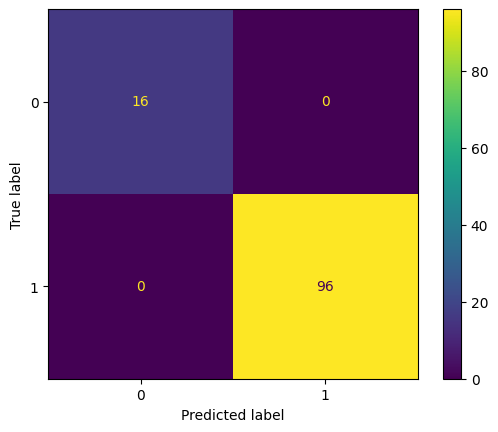

In [209]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_predictions = best_lr.predict(X_test)
cm = confusion_matrix(y_test, y_test_predictions, labels=best_lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_lr.classes_)
disp.plot()
plt.show()

In [212]:
from sklearn.metrics import classification_report
# ...existing code...
target_names = [str(label) for label in best_lr.classes_]
print(classification_report(y_test, y_test_predictions, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        96

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



# Modelo 2: Random Forest 

In [213]:
# GridSearchCV seguro: n_splits limitado por tamaño de la clase minoritaria
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC

min_class_size = y_train.value_counts().min()
n_splits = min(5, min_class_size)
if n_splits < 2:
    n_splits = 2  # Asegura al menos 2 splits
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Random Forest
params_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [4, 8, 12, None],
    "min_samples_split": [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=params_rf)
grid_rf.fit(X_train, y_train)
rf_best_model = grid_rf.best_estimator_
print("Mejor Random Forest: ", grid_rf.best_params_)

Mejor Random Forest:  {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 50}


### Evaluación del modelo

In [216]:
pred_rf_train   = rf_best_model.predict(X_train)
print_metrics("Random_Forest train: ",y_train,pred_rf_train )

Random_Forest train:   Accuracy: 0.993  Precision: 0.992  Recall: 1.000


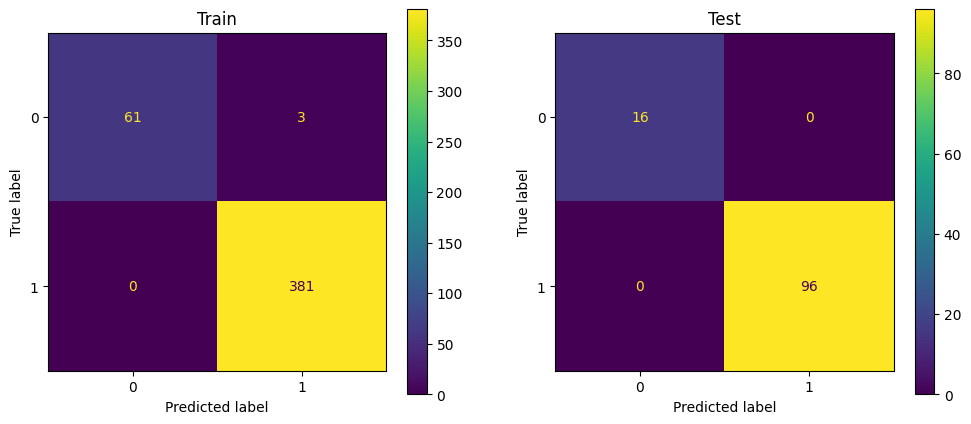

In [219]:
y_train_predictions_best = rf_best_model.predict(X_train)
y_test_predictions_best = rf_best_model.predict(X_test)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

train_val_cm = confusion_matrix(y_train, y_train_predictions_best, labels=rf_best_model.classes_)
train_val_disp = ConfusionMatrixDisplay(confusion_matrix=train_val_cm, display_labels=rf_best_model.classes_)
train_val_disp.plot(ax=axes[0])
axes[0].set_title("Train")

test_cm = confusion_matrix(y_test, y_test_predictions_best, labels=rf_best_model.classes_)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=rf_best_model.classes_)
test_disp.plot(ax=axes[1])
axes[1].set_title("Test")

plt.show()

In [220]:
from sklearn.metrics import classification_report
target_names = [str(label) for label in rf_best_model.classes_]
print(classification_report(y_test, y_test_predictions_best, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        96

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



### Importancias de las características

In [243]:
importances = rf_best_model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]
df_importances = pd.DataFrame({
    "Feature": feature_names[indices],
    "Importance": importances[indices],
}).sort_values(by="Importance", ascending=False)
df_importances.head(10)

,Feature,Importance
0,Inmunosupresor_2_6mesesPostTx=No,0.389978
1,Inmunosupresor_2_6mesesPostTx=MICOFENOLATO,0.194682
2,Inmunosupresor_2_PostTx_1mesPx=No,0.175593
3,Inmunosupresor_1_1mesPostTx=No,0.053269
4,Inmunosupresor_2_PostTx_1mesPx=MICOFENOLATO,0.041585
5,Dias_Estancia_Hospitalaria,0.039006
6,Inmunosupresor_2_PostTx=No,0.026304
7,Inmunosupresor_1_6mesesPostx=No,0.015031
8,Antibiótico_1__Tx#1=CEFTAZIDIMA AVIBACTAM,0.012708
9,Inmunosupresor_1_Postx=No,0.011701


# Modelo 3: Regresión Lineal

In [238]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error


def regression_metrics(y_true, y_pred, n_features: int = None):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    n = len(y_true)
    p = n_features  # por ejemplo X.shape[1]
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1) if n_features is not None else None

    metrics = {
        'MAE': mae,
        'RMSE': rmse,
        'R²': round(r2, 4),
        'Adj R²': round(r2_adj, 4) if r2_adj is not None else None,
        'MAPE': round(mape, 4)*100
    }


    print(f"MAE:   {mae:.4f} ")
    print(f"RMSE:  {rmse:.4f} ")
    print(f"R²:    {r2:.4f}")

    return metrics

In [234]:
from sklearn.linear_model import LinearRegression

modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [239]:
# Se obtienen las predicciones del modelo sobre el conjunto test.
y_pred_train = modelo_regresion.predict(X_train)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
metrics_train = regression_metrics(y_train, y_pred_train, n_features=X_train.shape[1])

MAE:   0.0482 
RMSE:  0.1203 
R²:    0.8825


In [240]:
# Se obtienen las predicciones del modelo sobre el conjunto test.
y_pred_test = modelo_regresion.predict(X_test)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
metrics_test = regression_metrics(y_test, y_pred_test, n_features=X_test.shape[1])

MAE:   0.0466 
RMSE:  0.1311 
R²:    0.8597


In [237]:
coeficientes = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': modelo_regresion.coef_
})
coeficientes.head(10)

,Feature,Coefficient
0,Inmunosupresor_2_6mesesPostTx=No,-0.858569
1,Inmunosupresor_1_Postx=No,0.192184
2,Inmunosupresor_2_6mesesPostTx=MICOFENOLATO,0.023001
3,Antibiótico_1__Tx#1=CEFTAZIDIMA AVIBACTAM,0.036227
4,Inmunosupresor_2_PostTx=No,-0.658800
5,Inmunosupresor_1_1mesPostTx=No,-0.156270
6,Antifúngico_Tx#1=VORICONAZOL,-0.464379
7,Requerimiento_de_diálisis=NO,0.003063
8,Etiología_#1=CIRROSIS DEL INJERTO,-0.284679
9,Inmunosupresor_2_PostTx_1mesPx=MICOFENOLATO,0.010125
